In [ ]:
#pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 4.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [gensim]2m1/2 [gensim]
Note: you may need to restart the kernel to use updated packages.


In [30]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

In [36]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [31]:
model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)
model.save("word2vec.model")

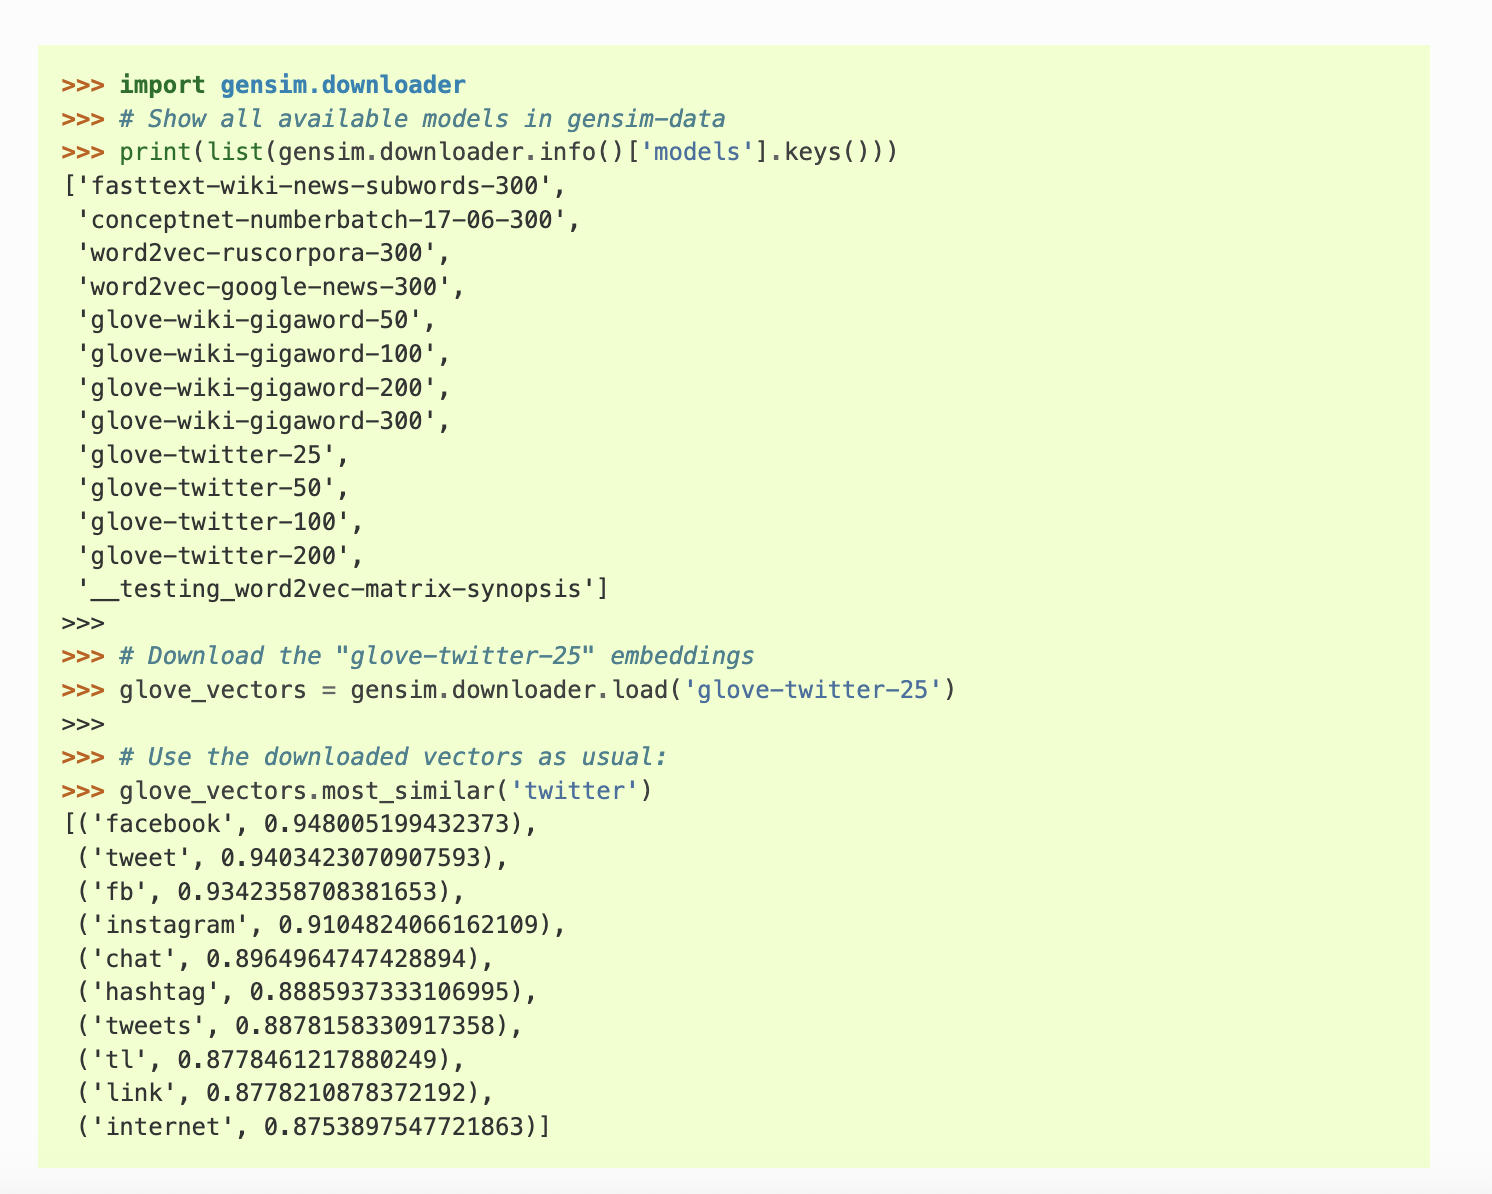

In [32]:
model = Word2Vec.load("word2vec.model")

In [35]:
sims = model.wv.most_similar('India', topn=10)
sims

KeyError: "Key 'India' not present in vocabulary"

In [33]:
sims = model.wv.most_similar('computer', topn=10)
sims

[('system', 0.21617144346237183),
 ('survey', 0.044689226895570755),
 ('interface', 0.015203378163278103),
 ('time', 0.0019510635174810886),
 ('trees', -0.032843150198459625),
 ('human', -0.0742427185177803),
 ('response', -0.09317590296268463),
 ('graph', -0.09575342386960983),
 ('eps', -0.10513807833194733),
 ('user', -0.16911619901657104)]

In [6]:
from gensim.downloader import load

In [7]:
w2v_goog_300 = load("word2vec-google-news-300")  # smallest available from API

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [37]:
w2v  = w2v_goog_300

In [42]:
w2v.most_similar('Google', topn=10)

[('Google_Nasdaq_GOOG', 0.7819362878799438),
 ('Google_GOOG', 0.7756521105766296),
 ('Google_NASDAQ_GOOG', 0.7557773590087891),
 ('Google_NSDQ_GOOG', 0.7538513541221619),
 ('Yahoo', 0.7491979002952576),
 ('GoogleGoogle', 0.7281472682952881),
 ('search_engine', 0.7255110144615173),
 ('Google_nasdaq_GOOG', 0.7014852166175842),
 ('Baidu', 0.699346661567688),
 ('NASDAQ_GOOG', 0.6812566518783569)]

In [38]:
w2v["computer"]  # 300-dimensional vector

array([ 1.07421875e-01, -2.01171875e-01,  1.23046875e-01,  2.11914062e-01,
       -9.13085938e-02,  2.16796875e-01, -1.31835938e-01,  8.30078125e-02,
        2.02148438e-01,  4.78515625e-02,  3.66210938e-02, -2.45361328e-02,
        2.39257812e-02, -1.60156250e-01, -2.61230469e-02,  9.71679688e-02,
       -6.34765625e-02,  1.84570312e-01,  1.70898438e-01, -1.63085938e-01,
       -1.09375000e-01,  1.49414062e-01, -4.65393066e-04,  9.61914062e-02,
        1.68945312e-01,  2.60925293e-03,  8.93554688e-02,  6.49414062e-02,
        3.56445312e-02, -6.93359375e-02, -1.46484375e-01, -1.21093750e-01,
       -2.27539062e-01,  2.45361328e-02, -1.24511719e-01, -3.18359375e-01,
       -2.20703125e-01,  1.30859375e-01,  3.66210938e-02, -3.63769531e-02,
       -1.13281250e-01,  1.95312500e-01,  9.76562500e-02,  1.26953125e-01,
        6.59179688e-02,  6.93359375e-02,  1.02539062e-02,  1.75781250e-01,
       -1.68945312e-01,  1.21307373e-03, -2.98828125e-01, -1.15234375e-01,
        5.66406250e-02, -

In [41]:
import re
import numpy as np
import pandas as pd
sentences_raw = [
    "The government announced a new economic policy today.",
    "The election results will influence future political decisions.",
    "The movie received excellent reviews from critics.",
    "The lead actor delivered an outstanding performance in the film.",
    "The director is planning a new film based on real events.",
    "The director is planning a new film based with new actor and it is based on critics reviews."
]
def preprocess(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z ]", "", text)
    return text.split()

sentences = [preprocess(s) for s in sentences_raw]
sentences




[['the', 'government', 'announced', 'a', 'new', 'economic', 'policy', 'today'],
 ['the',
  'election',
  'results',
  'will',
  'influence',
  'future',
  'political',
  'decisions'],
 ['the', 'movie', 'received', 'excellent', 'reviews', 'from', 'critics'],
 ['the',
  'lead',
  'actor',
  'delivered',
  'an',
  'outstanding',
  'performance',
  'in',
  'the',
  'film'],
 ['the',
  'director',
  'is',
  'planning',
  'a',
  'new',
  'film',
  'based',
  'on',
  'real',
  'events'],
 ['the',
  'director',
  'is',
  'planning',
  'a',
  'new',
  'film',
  'based',
  'with',
  'new',
  'actor',
  'and',
  'it',
  'is',
  'based',
  'on',
  'critics',
  'reviews']]

In [44]:
for s in sentences:
    tok = s
    print(tok)
    break

['the', 'government', 'announced', 'a', 'new', 'economic', 'policy', 'today']


In [48]:
for t in tok:
    print(t)
    break

the


In [49]:
w2v[t]

array([ 0.08007812,  0.10498047,  0.04980469,  0.0534668 , -0.06738281,
       -0.12060547,  0.03515625, -0.11865234,  0.04394531,  0.03015137,
       -0.05688477, -0.07617188,  0.01287842,  0.04980469, -0.08496094,
       -0.06347656,  0.00628662, -0.04321289,  0.02026367,  0.01330566,
       -0.01953125,  0.09277344, -0.171875  , -0.00131989,  0.06542969,
        0.05834961, -0.08251953,  0.0859375 , -0.00318909,  0.05859375,
       -0.03491211, -0.0123291 , -0.0480957 , -0.00302124,  0.05639648,
        0.01495361, -0.07226562, -0.05224609,  0.09667969,  0.04296875,
       -0.03540039, -0.07324219,  0.03271484, -0.06176758,  0.00787354,
        0.0035553 , -0.00878906,  0.0390625 ,  0.03833008,  0.04443359,
        0.06982422,  0.01263428, -0.00445557, -0.03320312, -0.04272461,
        0.09765625, -0.02160645, -0.0378418 ,  0.01190186, -0.01391602,
       -0.11328125,  0.09326172, -0.03930664, -0.11621094,  0.02331543,
       -0.01599121,  0.02636719,  0.10742188, -0.00466919,  0.09

In [ ]:

sentence_vector(tok)

array([-3.77981998e-02,  6.26999978e-03,  2.00195312e-02,  3.95856574e-02,
       -2.63497494e-02, -1.88650951e-01,  1.97230745e-02, -1.99672161e-03,
        9.39592645e-02,  1.22070312e-04, -5.30482717e-02, -8.67135152e-02,
       -2.72478368e-02, -1.94963720e-02, -1.21259414e-01,  8.57805535e-02,
        1.55901229e-02,  5.60106561e-02,  2.79017870e-04, -3.35867740e-02,
       -5.56117482e-02,  1.06260024e-01, -2.50331331e-02,  8.53075273e-03,
        2.00544093e-02,  9.96660516e-02,  5.69283627e-02,  7.17642680e-02,
        5.47201969e-02,  4.52880859e-02, -1.56969335e-02, -1.20204382e-01,
       -4.31082584e-02,  1.22288300e-03, -2.81459261e-02,  1.07334685e-02,
        5.36411814e-02, -2.43094303e-02,  6.45228773e-02,  3.51333618e-02,
        2.17459537e-02, -8.23451430e-02,  1.23849049e-01,  3.53567936e-02,
       -9.96507891e-03, -1.04054041e-01,  5.02929688e-02,  5.66406250e-02,
       -1.51402071e-01,  7.40094855e-02,  1.05224609e-01,  6.17588572e-02,
       -6.16716668e-02,  

In [51]:
def sentence_vector(tokens):
    vecs = [w2v[word] for word in tokens if word in w2v]
    if len(vecs) == 0:
        return np.zeros(300)
    return np.mean(vecs, axis=0)

vectors = [sentence_vector(s) for s in sentences]

In [53]:
len(vectors)

6

In [54]:
from sklearn.metrics.pairwise import cosine_similarity
def cosine_sim(v1, v2):
    return cosine_similarity([v1], [v2])[0][0]

In [55]:
v1 = w2v["government"]
v2 = w2v["makes"]
v3 = w2v ["policy"]

In [56]:
cosine_sim(v1,v2)

0.020483036

In [58]:
cosine_sim(v3,v2) ## Larger Value is more similar

0.051672705

In [59]:
from math import sqrt
def euclidean(v1, v2):
    return np.sqrt(np.sum((v1 - v2)**2))

In [61]:
S6_vec = vectors[5]

distances = {
    "Sentence": ["S1","S2","S3","S4","S5"],
    "Distance_from_S6": [
        euclidean(S6_vec, vectors[0]),
        euclidean(S6_vec, vectors[1]),
        euclidean(S6_vec, vectors[2]),
        euclidean(S6_vec, vectors[3]),
        euclidean(S6_vec, vectors[4]),
    ],
    "Theme": ["Political", "Political", "Movie", "Movie", "Movie"]
}

df_w2v = pd.DataFrame(distances)

In [62]:
df_w2v

,Sentence,Distance_from_S6,Theme
0,S1,1.056136,Political
1,S2,1.242435,Political
2,S3,0.906584,Movie
3,S4,0.855406,Movie
4,S5,0.473053,Movie


## Using Gensim

In [29]:
import gensim.downloader as api

# Download once
glove_vectors = api.load("glove-twitter-25")

# Save locally
glove_vectors.save("glove_twitter_25.model")


[==================================================] 100.0% 104.8/104.8MB downloaded


## Load Locally 

In [63]:
from gensim.models import KeyedVectors

# Load from your local file (fast, no internet needed)
glove_vectors = KeyedVectors.load("glove_twitter_25.model")

print("Model loaded from disk!")


Model loaded from disk!


In [64]:
print(glove_vectors.most_similar("king"))
print(glove_vectors["movie"])


[('prince', 0.9337409734725952), ('queen', 0.920242190361023), ('aka', 0.9176921844482422), ('lady', 0.9163240790367126), ('jack', 0.9147354960441589), ("'s", 0.9066898226737976), ('stone', 0.8982374668121338), ('mr.', 0.8919408321380615), ('the', 0.889343798160553), ('star', 0.8892088532447815)]
[ 0.3569   -0.24292   1.5525   -0.40293   0.053246 -0.38882   2.1696
  0.54185   0.12384  -0.88946  -0.18272   0.64263  -3.8322    0.12828
  0.38866   0.9754    0.56106  -0.048216 -0.47214   0.58174  -0.67981
  0.26981  -0.50217  -0.41104   0.59677 ]
